In [68]:
# pip install catboost

     -------------------------------------- 101.1/101.1 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from ydata_profiling import ProfileReport
import tensorflow as tf
from tensorflow.keras.callbacks import History
from sklearn.preprocessing import StandardScaler
#import tensorflow_decision_forests as tfdf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#import xgboost as xgb
from sklearn.metrics import accuracy_score


In [3]:
# Baca data
df = pd.read_csv('data_finish_labelled.csv')
df.tail()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood,label_hujan
3131,12/21/2020,24.8,29.6,27.4,76.0,4.2,2.4,5.0,290.0,2.0,C,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0,YES
3132,12/23/2020,25.6,34.8,29.6,65.0,0.0,2.0,7.0,280.0,2.0,W,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0,NO
3133,12/24/2020,26.4,33.4,28.9,68.0,0.0,7.0,5.0,300.0,2.0,C,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0,NO
3134,12/29/2020,26.4,32.0,28.3,73.0,0.0,5.3,9.0,290.0,2.0,C,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0,NO
3135,12/31/2020,25.6,30.2,26.5,83.0,5.0,0.2,4.0,240.0,1.0,C,96745,Stasiun Meteorologi Kemayoran,Jakarta Pusat,0,YES


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3136 non-null   object 
 1   Tn            3136 non-null   float64
 2   Tx            3136 non-null   float64
 3   Tavg          3136 non-null   float64
 4   RH_avg        3136 non-null   float64
 5   RR            3136 non-null   float64
 6   ss            3136 non-null   float64
 7   ff_x          3136 non-null   float64
 8   ddd_x         3136 non-null   float64
 9   ff_avg        3136 non-null   float64
 10  ddd_car       3136 non-null   object 
 11  station_id    3136 non-null   int64  
 12  station_name  3136 non-null   object 
 13  region_name   3136 non-null   object 
 14  flood         3136 non-null   int64  
 15  label_hujan   3136 non-null   object 
dtypes: float64(9), int64(2), object(5)
memory usage: 392.1+ KB


In [5]:
unique_values = df['ddd_car'].unique()

# Menampilkan nilai unik
print("Nilai unik di kolom 'ddd_car':")
for value in unique_values:
    print(value)

Nilai unik di kolom 'ddd_car':
W 
SW
E 
S 
NE
SE
C 
N 
NW


In [6]:
# Dictionary untuk memetakan nilai-nilai lama ke nilai-nilai baru
mapping = {
    'W ': 1,
    'SW': 2,
    'E ': 3,
    'S ': 4,
    'NE': 5,
    'SE': 6,
    'C ': 7,
    'N ': 8,
    'NW': 9
}

# Kolom ddd_car yang ingin diubah
kolom_ddd_car = ['W ', 'SW', 'E ', 'S ', 'NE', 'SE', 'C ', 'N ', 'NW']

# Loop melalui kolom_ddd_car dan ubah nilai sesuai dengan mapping
for nilai_lama in kolom_ddd_car:
    # Gunakan nilai_lama sebagai kunci untuk mendapatkan nilai baru dari dictionary mapping
    nilai_baru = mapping[nilai_lama]
    # Ubah nilai lama dengan nilai baru di DataFrame
    df.loc[df['ddd_car'] == nilai_lama, 'ddd_car'] = nilai_baru
    
# Melakukan casting kolom 'ddd_car' dari object menjadi int
df['ddd_car'] = df['ddd_car'].astype(int)

# Menggunakan metode replace() untuk mengubah nilai YES menjadi 1 dan NO menjadi 0
df['label_hujan'] = df['label_hujan'].replace({'YES': 1, 'NO': 0})


# Menampilkan DataFrame setelah perubahan
df.head()


,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,flood,label_hujan
0,1/2/2016,25.6,33.2,27.0,88.0,1.6,8.7,4.0,290.0,2.0,1,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,1
1,1/3/2016,24.4,34.9,28.1,80.0,33.8,5.4,4.0,280.0,2.0,2,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,1
2,1/6/2016,25.0,33.6,28.9,80.0,3.8,3.6,4.0,190.0,2.0,3,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1
3,1/12/2016,26.2,31.2,26.0,93.0,11.5,5.7,3.0,50.0,1.0,4,96733,Stasiun Klimatologi Banten,Jakarta Selatan,1,1
4,1/13/2016,24.8,33.3,26.3,92.0,36.3,0.9,3.0,270.0,1.0,3,96733,Stasiun Klimatologi Banten,Jakarta Selatan,0,1


In [7]:
# Menghitung jumlah untuk setiap kondisi
jumlah_kondisi_1 = len(df[(df['RR'] > 0) & (df['label_hujan'] == 1)])
jumlah_kondisi_2 = len(df[(df['RR'] == 0) & (df['label_hujan'] == 1)])
jumlah_kondisi_3 = len(df[(df['RR'] == 0) & (df['label_hujan'] == 0)])
jumlah_kondisi_4 = len(df[(df['RR'] > 0) & (df['label_hujan'] == 0)])

# Menampilkan jumlah untuk setiap kondisi
print("Jumlah Kondisi 1:", jumlah_kondisi_1)
print("Jumlah Kondisi 2:", jumlah_kondisi_2)
print("Jumlah Kondisi 3:", jumlah_kondisi_3)
print("Jumlah Kondisi 4:", jumlah_kondisi_4)


Jumlah Kondisi 1: 1810
Jumlah Kondisi 2: 10
Jumlah Kondisi 3: 1316
Jumlah Kondisi 4: 0


In [ ]:
profilling = ProfileReport(df, title="Jakarta Rainfall")
profilling.to_notebook_iframe()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3136 non-null   object 
 1   Tn            3136 non-null   float64
 2   Tx            3136 non-null   float64
 3   Tavg          3136 non-null   float64
 4   RH_avg        3136 non-null   float64
 5   RR            3136 non-null   float64
 6   ss            3136 non-null   float64
 7   ff_x          3136 non-null   float64
 8   ddd_x         3136 non-null   float64
 9   ff_avg        3136 non-null   float64
 10  ddd_car       3136 non-null   int32  
 11  station_id    3136 non-null   int64  
 12  station_name  3136 non-null   object 
 13  region_name   3136 non-null   object 
 14  flood         3136 non-null   int64  
 15  label_hujan   3136 non-null   int64  
dtypes: float64(9), int32(1), int64(3), object(3)
memory usage: 379.9+ KB


In [9]:
# Pisahkan fitur dan target
# X = df[['RR', 'Tn', 'Tx', 'ff_avg', 'ff_x', 'Tavg', 'ddd_car', 'ss', 'ddd_x', 'RH_avg']]
X = df[['Tn', 'Tx', 'ff_avg', 'ff_x', 'Tavg', 'ddd_car', 'ss', 'ddd_x', 'RH_avg']]
y = df['label_hujan']

# # Lakukan encoding one-hot terhadap fitur kategori ddd_car
# onehot_encoder = OneHotEncoder(sparse=False)
# ddd_car_encoded = onehot_encoder.fit_transform(df['ddd_car'].values.reshape(-1, 1))
# ddd_car_encoded_df = pd.DataFrame(ddd_car_encoded, columns=[f'ddd_car_{i}' for i in range(ddd_car_encoded.shape[1])])

# # Gabungkan fitur-fitur yang sudah diencode dengan fitur-fitur numerik lainnya
# X = pd.concat([df[['RR', 'Tn', 'Tx', 'ff_avg', 'ff_x', 'Tavg', 'ss', 'ddd_x', 'RH_avg']], ddd_car_encoded_df], axis=1)
# y = df['label_hujan']

In [10]:
# Bagi data menjadi data latih dan data uji

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# GBT

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Misalkan X_train, y_train, X_test, dan y_test sudah didefinisikan sebelumnya
max_estimators = 100
# Inisialisasi Gradient Boosting Classifier
gbt_model = GradientBoostingClassifier(n_estimators=max_estimators, random_state=42)

# Fit model terlebih dahulu
gbt_model.fit(X_train, y_train)

# List untuk menyimpan akurasi dari setiap iterasi
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_gbt = 0
best_train_iter = 0
best_test_accuracy_gbt = 0
best_test_iter = 0

# Menggunakan staged_predict setelah model difit
for i, (y_pred_train, y_pred_test) in enumerate(zip(gbt_model.staged_predict(X_train), gbt_model.staged_predict(X_test))):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_gbt:
        best_train_accuracy_gbt = train_accuracy
        best_train_iter = i + 1  # Iterasi dimulai dari 1 hingga n_estimators
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_gbt:
        best_test_accuracy_gbt = test_accuracy
        best_test_iter = i + 1

# Menggunakan model GBT yang telah difit sebelumnya
train_predictions_gbt = gbt_model.predict(X_train)
test_predictions_gbt = gbt_model.predict(X_test)

# Hitung akurasi untuk data latih dan data uji
train_accuracy_gbt = accuracy_score(y_train, train_predictions_gbt)
test_accuracy_gbt = accuracy_score(y_test, test_predictions_gbt)

# Print hasil akhir akurasi untuk data latih dan uji
print(f'Final Train Accuracy: {train_accuracy_gbt}')
print(f'Final Test Accuracy: {test_accuracy_gbt}')

# Print akurasi dari setiap iterasi
print("Train Accuracy History:")
print(train_accuracy_history)

print("Test Accuracy History:")
print(test_accuracy_history)

# Print iterasi terbaik berdasarkan akurasi
print(f'Best Train Accuracy: {best_train_accuracy_gbt} at iteration {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_gbt} at iteration {best_test_iter}')



Final Train Accuracy: 0.8707482993197279
Final Test Accuracy: 0.8303571428571429
Train Accuracy History:
[0.5782312925170068, 0.735969387755102, 0.8052721088435374, 0.8405612244897959, 0.8401360544217688, 0.8431122448979592, 0.8465136054421769, 0.8452380952380952, 0.8443877551020408, 0.842687074829932, 0.8443877551020408, 0.844812925170068, 0.8443877551020408, 0.8456632653061225, 0.8465136054421769, 0.8460884353741497, 0.8482142857142857, 0.8482142857142857, 0.8490646258503401, 0.8503401360544217, 0.8503401360544217, 0.8511904761904762, 0.8520408163265306, 0.8537414965986394, 0.8528911564625851, 0.8533163265306123, 0.8528911564625851, 0.8545918367346939, 0.8558673469387755, 0.8554421768707483, 0.8554421768707483, 0.8550170068027211, 0.85671768707483, 0.8558673469387755, 0.8575680272108843, 0.8571428571428571, 0.8592687074829932, 0.8592687074829932, 0.8592687074829932, 0.8592687074829932, 0.858843537414966, 0.8596938775510204, 0.8596938775510204, 0.8605442176870748, 0.860969387755102, 0

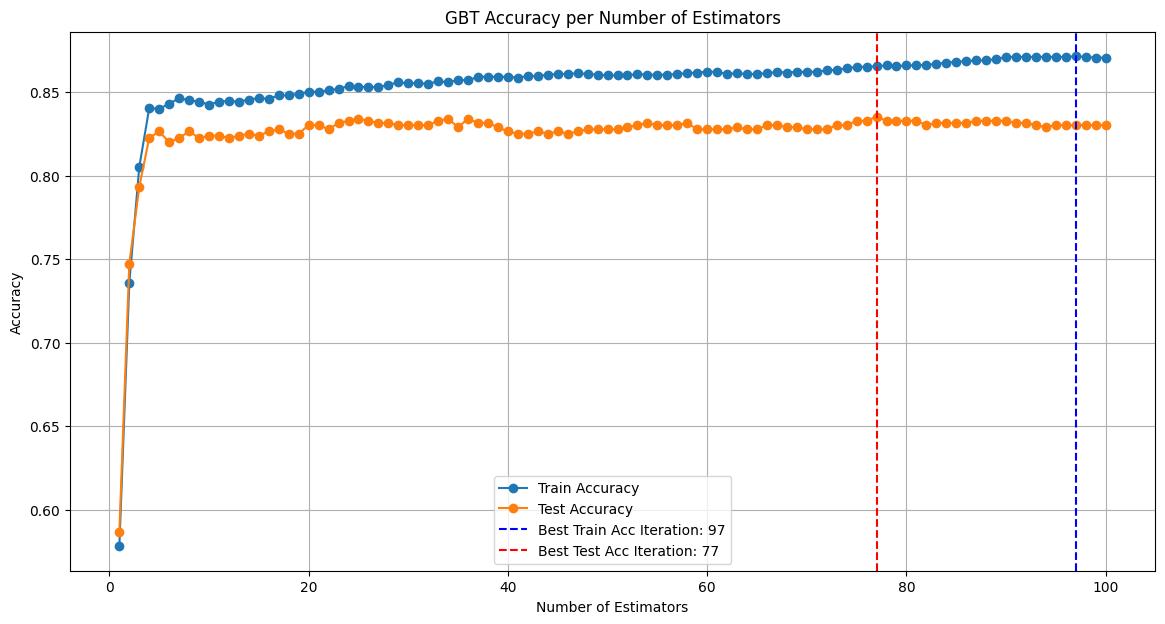

In [46]:
# Visualisasi akurasi menggunakan line chart
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_estimators + 1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, max_estimators + 1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.axvline(x=best_train_iter, color='b', linestyle='--', label=f'Best Train Acc Iteration: {best_train_iter}')
plt.axvline(x=best_test_iter, color='r', linestyle='--', label=f'Best Test Acc Iteration: {best_test_iter}')
plt.title('GBT Accuracy per Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# List untuk menyimpan akurasi dari setiap iterasi (jumlah pohon yang berbeda)
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_rf = 0
best_train_iter = 0
best_test_accuracy_rf = 0
best_test_iter = 0

# Menentukan jumlah maksimum pohon yang akan diuji
max_estimators = 100

# Loop melalui berbagai jumlah pohon dalam Random Forest
for i in range(1, max_estimators + 1):
    # Inisialisasi Random Forest dengan i pohon
    rf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    
    # Fit model
    rf_model.fit(X_train, y_train)
    
    # Prediksi pada data latih dan data uji
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)
    
    # Hitung akurasi
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Simpan akurasi ke dalam list
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_rf:
        best_train_accuracy_rf = train_accuracy
        best_train_iter = i
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_rf:
        best_test_accuracy_rf = test_accuracy
        best_test_iter = i

# Print hasil akhir akurasi untuk data latih dan uji
print(f'Final Train Accuracy: {train_accuracy_history[-1]}')
print(f'Final Test Accuracy: {test_accuracy_history[-1]}')

# Print akurasi dari setiap iterasi
print("Train Accuracy History:")
print(train_accuracy_history)

print("Test Accuracy History:")
print(test_accuracy_history)

# Print iterasi terbaik berdasarkan akurasi
print(f'Best Train Accuracy: {best_train_accuracy_rf} at iteration {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_rf} at iteration {best_test_iter}')


Final Train Accuracy: 1.0
Final Test Accuracy: 0.8316326530612245
Train Accuracy History:
[0.9162414965986394, 0.9102891156462585, 0.9579081632653061, 0.9630102040816326, 0.9770408163265306, 0.9787414965986394, 0.9821428571428571, 0.9821428571428571, 0.9868197278911565, 0.9885204081632653, 0.9914965986394558, 0.9906462585034014, 0.9914965986394558, 0.9927721088435374, 0.9944727891156463, 0.9944727891156463, 0.9961734693877551, 0.9957482993197279, 0.9953231292517006, 0.9948979591836735, 0.9965986394557823, 0.9974489795918368, 0.9982993197278912, 0.9982993197278912, 0.9982993197278912, 0.997874149659864, 0.9987244897959183, 0.9982993197278912, 0.9974489795918368, 0.9974489795918368, 0.9987244897959183, 0.9982993197278912, 0.9987244897959183, 0.9982993197278912, 0.9987244897959183, 0.9987244897959183, 0.9991496598639455, 0.9991496598639455, 0.9995748299319728, 0.9995748299319728, 0.9995748299319728, 0.9991496598639455, 0.9991496598639455, 0.9991496598639455, 0.9995748299319728, 0.99957482

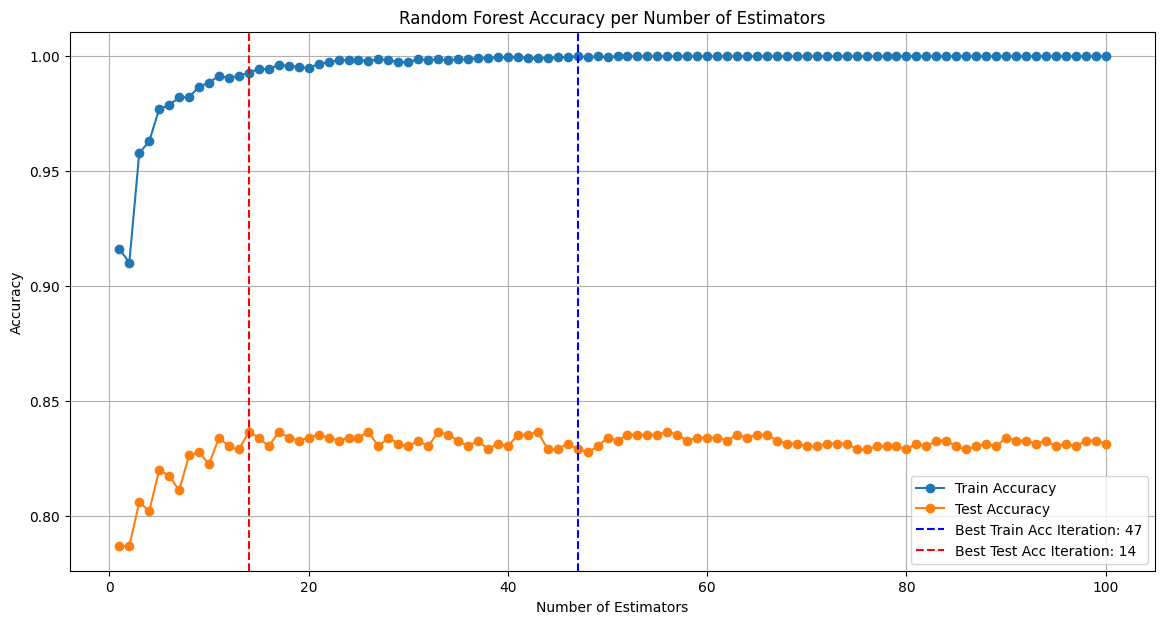

In [49]:
# Visualisasi akurasi menggunakan line chart
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_estimators + 1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, max_estimators + 1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.axvline(x=best_train_iter, color='b', linestyle='--', label=f'Best Train Acc Iteration: {best_train_iter}')
plt.axvline(x=best_test_iter, color='r', linestyle='--', label=f'Best Test Acc Iteration: {best_test_iter}')
plt.title('Random Forest Accuracy per Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Logistic Regression

In [50]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Misalkan X_train, y_train, X_test, dan y_test sudah didefinisikan sebelumnya

# List untuk menyimpan akurasi dari setiap iterasi (nilai max_iter yang berbeda)
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_lr = 0
best_train_iter = 0
best_test_accuracy_lr = 0
best_test_iter = 0

# Menentukan jumlah maksimum iterasi yang akan diuji
max_iterations = 130

# Loop melalui berbagai nilai max_iter dalam Logistic Regression
for i in range(1, max_iterations + 1):
    # Inisialisasi Logistic Regression dengan i iterasi maksimum
    lr_model = LogisticRegression(max_iter=i, random_state=42, solver='lbfgs')
    
    # Fit model
    lr_model.fit(X_train, y_train)
    
    # Prediksi pada data latih dan data uji
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)
    
    # Hitung akurasi
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Simpan akurasi ke dalam list
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_lr:
        best_train_accuracy_lr = train_accuracy
        best_train_iter = i
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_lr:
        best_test_accuracy_lr = test_accuracy
        best_test_iter = i

# Print hasil akhir akurasi untuk data latih dan uji
print(f'Final Train Accuracy: {train_accuracy_history[-1]}')
print(f'Final Test Accuracy: {test_accuracy_history[-1]}')

# Print akurasi dari setiap iterasi
print("Train Accuracy History:")
print(train_accuracy_history)

print("Test Accuracy History:")
print(test_accuracy_history)

# Print iterasi terbaik berdasarkan akurasi
print(f'Best Train Accuracy: {best_train_accuracy_lr} at iteration {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_lr} at iteration {best_test_iter}')


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Final Train Accuracy: 0.8409863945578231
Final Test Accuracy: 0.8303571428571429
Train Accuracy History:
[0.5782312925170068, 0.5782312925170068, 0.6041666666666666, 0.6522108843537415, 0.7899659863945578, 0.8184523809523809, 0.8176020408163265, 0.8197278911564626, 0.8201530612244898, 0.8197278911564626, 0.8197278911564626, 0.8222789115646258, 0.8205782312925171, 0.8227040816326531, 0.826530612244898, 0.8222789115646258, 0.8248299319727891, 0.8256802721088435, 0.8252551020408163, 0.8299319727891157, 0.828656462585034, 0.8333333333333334, 0.8354591836734694, 0.8375850340136054, 0.8435374149659864, 0.8422619047619048, 0.842687074829932, 0.8431122448979592, 0.8435374149659864, 0.8435374149659864, 0.8431122448979592, 0.8409863945578231, 0.842687074829932, 0.8422619047619048, 0.842687074829932, 0.8431122448979592, 0.8435374149659864, 0.8435374149659864, 0.8435374149659864, 0.8435374149659864, 0.8439625850340136, 0.8443877551020408, 0.8439625850340136, 0.8439625850340136, 0.842687074829932, 

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

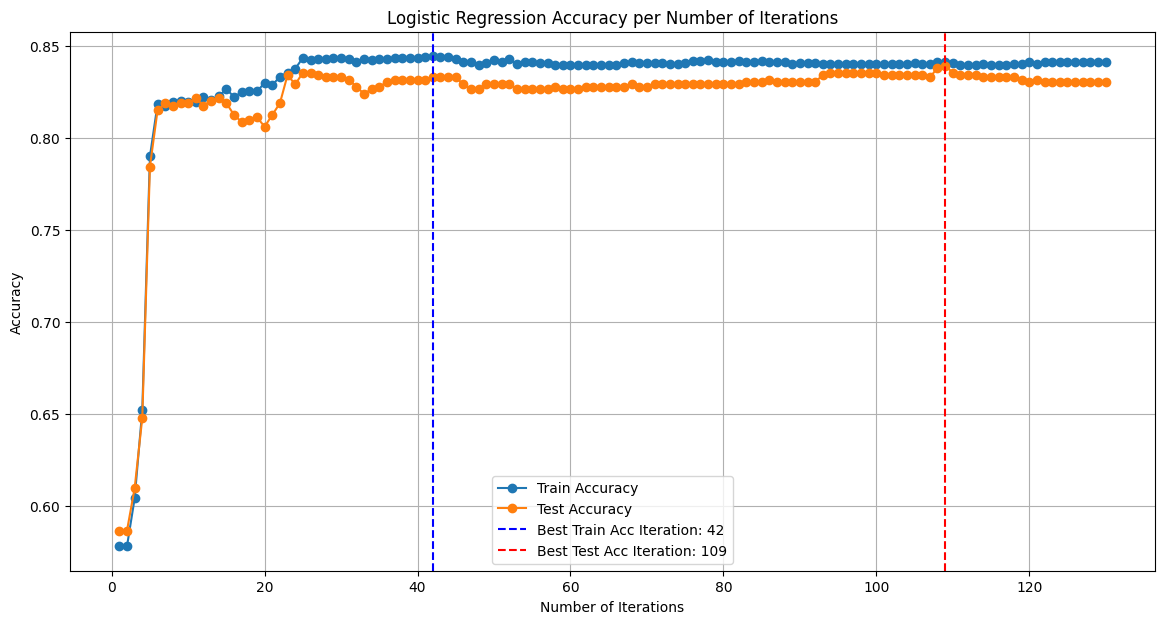

In [51]:
# Visualisasi akurasi menggunakan line chart
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_iterations + 1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, max_iterations + 1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.axvline(x=best_train_iter, color='b', linestyle='--', label=f'Best Train Acc Iteration: {best_train_iter}')
plt.axvline(x=best_test_iter, color='r', linestyle='--', label=f'Best Test Acc Iteration: {best_test_iter}')
plt.title('Logistic Regression Accuracy per Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Ada Boost Classifier

In [52]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Misalkan X_train, y_train, X_test, dan y_test sudah didefinisikan sebelumnya

# List untuk menyimpan akurasi dari setiap iterasi (jumlah estimators yang berbeda)
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_ada = 0
best_train_iter = 0
best_test_accuracy_ada = 0
best_test_iter = 0

# Menentukan jumlah maksimum estimators yang akan diuji
max_estimators = 135

# Loop melalui berbagai jumlah estimators dalam AdaBoost
for i in range(1, max_estimators + 1):
    # Inisialisasi AdaBoost dengan i estimators
    ada_model = AdaBoostClassifier(n_estimators=i, random_state=42)
    
    # Fit model
    ada_model.fit(X_train, y_train)
    
    # Prediksi pada data latih dan data uji
    y_pred_train = ada_model.predict(X_train)
    y_pred_test = ada_model.predict(X_test)
    
    # Hitung akurasi
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Simpan akurasi ke dalam list
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_ada:
        best_train_accuracy_ada = train_accuracy
        best_train_iter = i
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_ada:
        best_test_accuracy_ada = test_accuracy
        best_test_iter = i

# Print hasil akhir akurasi untuk data latih dan uji
print(f'Final Train Accuracy: {train_accuracy_history[-1]}')
print(f'Final Test Accuracy: {test_accuracy_history[-1]}')

# Print akurasi dari setiap iterasi
print("Train Accuracy History:")
print(train_accuracy_history)

print("Test Accuracy History:")
print(test_accuracy_history)

# Print iterasi terbaik berdasarkan akurasi
print(f'Best Train Accuracy: {best_train_accuracy_ada} at iteration {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_ada} at iteration {best_test_iter}')



D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.

D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.

D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.

D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.

Final Train Accuracy: 0.8490646258503401
Final Test Accuracy: 0.8329081632653061
Train Accuracy History:
[0.7959183673469388, 0.7959183673469388, 0.7959183673469388, 0.8061224489795918, 0.8065476190476191, 0.8061224489795918, 0.8035714285714286, 0.8035714285714286, 0.8044217687074829, 0.8069727891156463, 0.8167517006802721, 0.810374149659864, 0.8197278911564626, 0.8290816326530612, 0.828656462585034, 0.8312074829931972, 0.828656462585034, 0.8312074829931972, 0.8329081632653061, 0.8337585034013606, 0.8324829931972789, 0.8346088435374149, 0.8333333333333334, 0.8337585034013606, 0.8337585034013606, 0.8333333333333334, 0.8333333333333334, 0.8384353741496599, 0.8354591836734694, 0.8367346938775511, 0.8375850340136054, 0.8384353741496599, 0.8367346938775511, 0.8384353741496599, 0.8388605442176871, 0.8409863945578231, 0.8401360544217688, 0.8422619047619048, 0.8397108843537415, 0.8397108843537415, 0.8388605442176871, 0.8439625850340136, 0.8435374149659864, 0.8435374149659864, 0.845663265306122

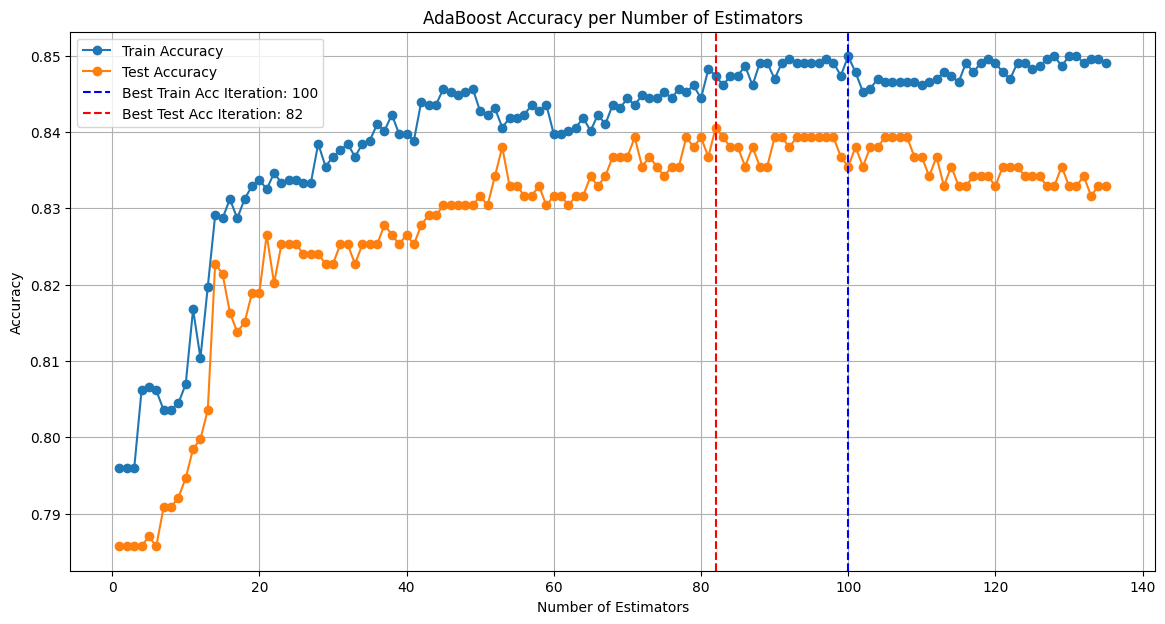

In [53]:
# Visualisasi akurasi menggunakan line chart
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_estimators + 1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, max_estimators + 1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.axvline(x=best_train_iter, color='b', linestyle='--', label=f'Best Train Acc Iteration: {best_train_iter}')
plt.axvline(x=best_test_iter, color='r', linestyle='--', label=f'Best Test Acc Iteration: {best_test_iter}')
plt.title('AdaBoost Accuracy per Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Decision Tree

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Misalkan X_train, y_train, X_test, dan y_test sudah didefinisikan sebelumnya

# List untuk menyimpan akurasi dari setiap iterasi (kedalaman pohon yang berbeda)
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_dt = 0
best_train_iter = 0
best_test_accuracy_dt = 0
best_test_iter = 0

# Menentukan kedalaman maksimum pohon yang akan diuji
max_depths = 20  # Misalnya, Anda bisa menentukan berapa kedalaman maksimum yang ingin Anda uji

# Loop melalui berbagai kedalaman pohon dalam Decision Tree
for i in range(1, max_depths + 1):
    # Inisialisasi Decision Tree dengan kedalaman i
    dt_model = DecisionTreeClassifier(max_depth=i, random_state=42)
    
    # Fit model
    dt_model.fit(X_train, y_train)
    
    # Prediksi pada data latih dan data uji
    y_pred_train = dt_model.predict(X_train)
    y_pred_test = dt_model.predict(X_test)
    
    # Hitung akurasi
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Simpan akurasi ke dalam list
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_dt:
        best_train_accuracy_dt = train_accuracy
        best_train_iter = i
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_dt:
        best_test_accuracy_dt = test_accuracy
        best_test_iter = i

# Print hasil akhir akurasi untuk data latih dan uji
print(f'Final Train Accuracy: {train_accuracy_history[-1]}')
print(f'Final Test Accuracy: {test_accuracy_history[-1]}')

# Print akurasi dari setiap iterasi
print("Train Accuracy History:")
print(train_accuracy_history)

print("Test Accuracy History:")
print(test_accuracy_history)

# Print iterasi terbaik berdasarkan akurasi
print(f'Best Train Accuracy: {best_train_accuracy_dt} at iteration {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_dt} at iteration {best_test_iter}')


Final Train Accuracy: 1.0
Final Test Accuracy: 0.7704081632653061
Train Accuracy History:
[0.7959183673469388, 0.8273809523809523, 0.8320578231292517, 0.8392857142857143, 0.8520408163265306, 0.8681972789115646, 0.8873299319727891, 0.9034863945578231, 0.9217687074829932, 0.9426020408163265, 0.9587585034013606, 0.9732142857142857, 0.983843537414966, 0.9906462585034014, 0.9936224489795918, 0.9957482993197279, 0.9974489795918368, 0.9982993197278912, 1.0, 1.0]
Test Accuracy History:
[0.7857142857142857, 0.8201530612244898, 0.8150510204081632, 0.8380102040816326, 0.8227040816326531, 0.8188775510204082, 0.8099489795918368, 0.8125, 0.8073979591836735, 0.7920918367346939, 0.7946428571428571, 0.7806122448979592, 0.7793367346938775, 0.7729591836734694, 0.7818877551020408, 0.7742346938775511, 0.7665816326530612, 0.7716836734693877, 0.7704081632653061, 0.7704081632653061]
Best Train Accuracy: 1.0 at iteration 19
Best Test Accuracy: 0.8380102040816326 at iteration 4


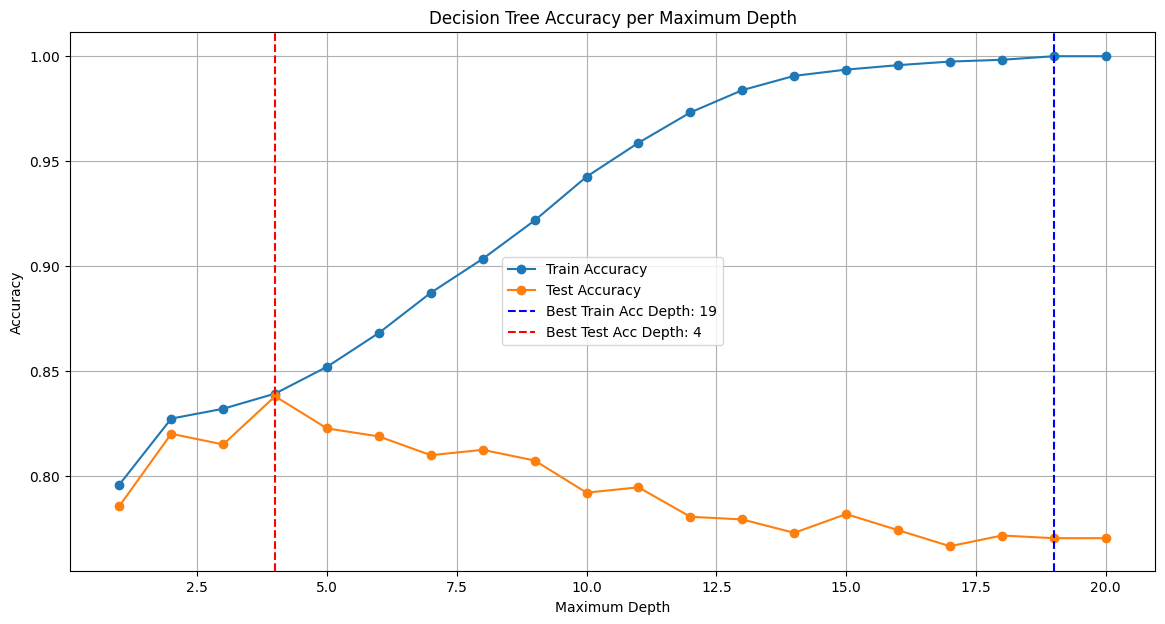

In [55]:
# Visualisasi akurasi menggunakan line chart
plt.figure(figsize=(14, 7))
plt.plot(range(1, max_depths + 1), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, max_depths + 1), test_accuracy_history, label='Test Accuracy', marker='o')
plt.axvline(x=best_train_iter, color='b', linestyle='--', label=f'Best Train Acc Depth: {best_train_iter}')
plt.axvline(x=best_test_iter, color='r', linestyle='--', label=f'Best Test Acc Depth: {best_test_iter}')
plt.title('Decision Tree Accuracy per Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# SVC (Support Vector Classifier)

In [59]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Misalkan X_train, y_train, X_test, dan y_test sudah didefinisikan sebelumnya

# List untuk menyimpan akurasi dari setiap iterasi (parameter kernel yang berbeda)
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_svc = 0
best_train_iter = ''
best_test_accuracy_svc = 0
best_test_iter = ''

# Parameter kernel yang akan diuji
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Loop melalui berbagai parameter kernel dalam SVM
for kernel in kernels:
    # Inisialisasi SVM dengan kernel tertentu
    svc_model = SVC(kernel=kernel, random_state=42)
    
    # Fit model
    svc_model.fit(X_train, y_train)
    
    # Prediksi pada data latih dan data uji
    y_pred_train = svc_model.predict(X_train)
    y_pred_test = svc_model.predict(X_test)
    
    # Hitung akurasi
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Simpan akurasi ke dalam list
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_svc:
        best_train_accuracy_svc = train_accuracy
        best_train_iter = kernel
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_svc:
        best_test_accuracy_svc = test_accuracy
        best_test_iter = kernel

# Print hasil akhir akurasi untuk data latih dan uji
print(f'Final Train Accuracy: {train_accuracy_history[-1]}')
print(f'Final Test Accuracy: {test_accuracy_history[-1]}')

# Print akurasi dari setiap iterasi
print("Train Accuracy History:")
print(train_accuracy_history)

print("Test Accuracy History:")
print(test_accuracy_history)

# Print iterasi terbaik berdasarkan akurasi
print(f'Best Train Accuracy: {best_train_accuracy_svc} with kernel: {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_svc} with kernel: {best_test_iter}')


Final Train Accuracy: 0.5514455782312925
Final Test Accuracy: 0.5625
Train Accuracy History:
[0.8397108843537415, 0.7474489795918368, 0.798469387755102, 0.5514455782312925]
Test Accuracy History:
[0.8303571428571429, 0.7219387755102041, 0.7844387755102041, 0.5625]
Best Train Accuracy: 0.8397108843537415 with kernel: linear
Best Test Accuracy: 0.8303571428571429 with kernel: linear


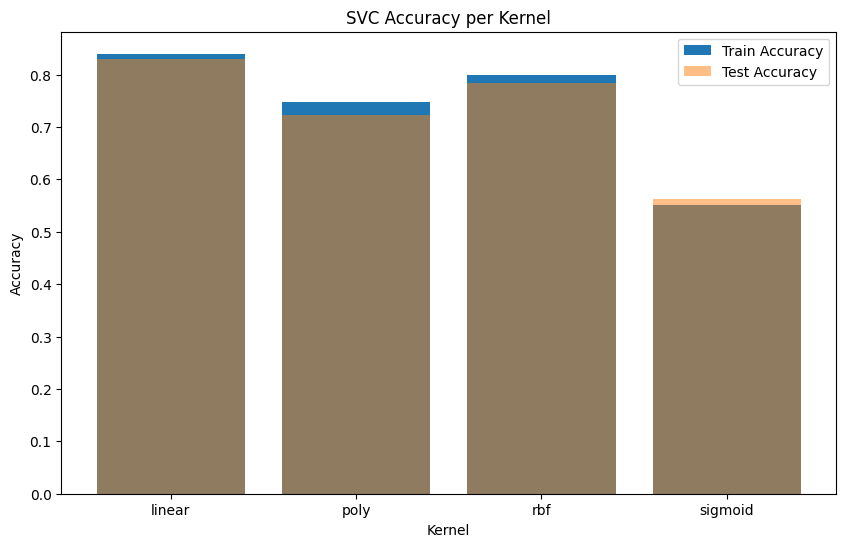

In [60]:
# Visualisasi akurasi menggunakan bar chart
plt.figure(figsize=(10, 6))
plt.bar(kernels, train_accuracy_history, label='Train Accuracy')
plt.bar(kernels, test_accuracy_history, label='Test Accuracy', alpha=0.5)
plt.title('SVC Accuracy per Kernel')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# XGBoost

In [64]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Inisialisasi model XGBoost
xgb_model = xgb.XGBClassifier()

# List untuk menyimpan akurasi dari setiap iterasi
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_xgb = 0
best_train_iter = 0
best_test_accuracy_xgb = 0
best_test_iter = 0

# Menggunakan model XGBoost yang telah difit sebelumnya
for i in range(1, 101):  # 100 iterasi
    # Latih model dengan iterasi tertentu
    xgb_model.set_params(n_estimators=i)
    xgb_model.fit(X_train, y_train)
    
    # Prediksi pada data latih dan data uji
    y_pred_train = xgb_model.predict(X_train)
    y_pred_test = xgb_model.predict(X_test)
    
    # Hitung akurasi
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Simpan akurasi ke dalam list
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_xgb:
        best_train_accuracy_xgb = train_accuracy
        best_train_iter = i
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_xgb:
        best_test_accuracy_xgb = test_accuracy
        best_test_iter = i

# Print akurasi terbaik dari 100 iterasi
print(f'Best Train Accuracy: {best_train_accuracy_xgb} at iteration {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_xgb} at iteration {best_test_iter}')

Best Train Accuracy: 0.997874149659864 at iteration 89
Best Test Accuracy: 0.8456632653061225 at iteration 11


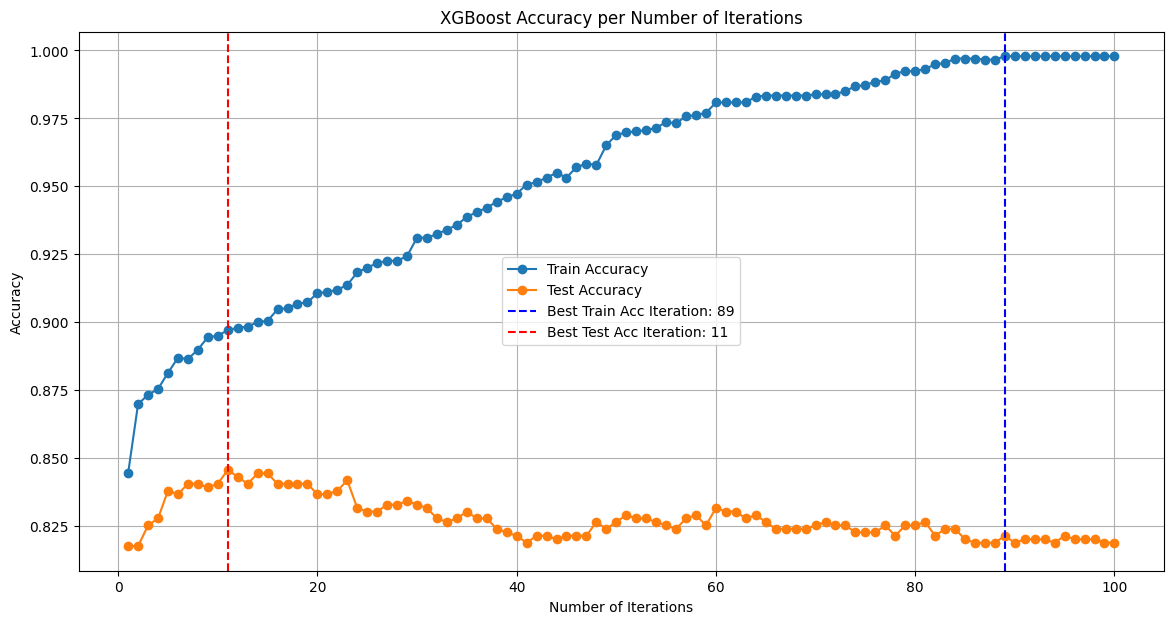

In [65]:
# Visualisasi akurasi menggunakan line chart
plt.figure(figsize=(14, 7))
plt.plot(range(1, 101), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, 101), test_accuracy_history, label='Test Accuracy', marker='o')
plt.axvline(x=best_train_iter, color='b', linestyle='--', label=f'Best Train Acc Iteration: {best_train_iter}')
plt.axvline(x=best_test_iter, color='r', linestyle='--', label=f'Best Test Acc Iteration: {best_test_iter}')
plt.title('XGBoost Accuracy per Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# CatBoost

In [115]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# List untuk menyimpan akurasi dari setiap iterasi
train_accuracy_history = []
test_accuracy_history = []

# Variabel untuk melacak iterasi dengan akurasi tertinggi
best_train_accuracy_cat = 0
best_train_iter = 0
best_test_accuracy_cat = 0
best_test_iter = 0

# Menggunakan model CatBoost yang baru untuk setiap iterasi
for i in range(1, 101):  # 100 iterasi
    # Inisialisasi model CatBoost
    catboost_model = CatBoostClassifier(iterations=i, verbose=False)
    
    # Latih model
    catboost_model.fit(X_train, y_train)
    
    # Prediksi pada data latih dan data uji
    y_pred_train = catboost_model.predict(X_train)
    y_pred_test = catboost_model.predict(X_test)
    
    # Hitung akurasi
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Simpan akurasi ke dalam list
    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)
    
    # Update iterasi terbaik untuk data latih
    if train_accuracy > best_train_accuracy_cat:
        best_train_accuracy_cat = train_accuracy
        best_train_iter = i
    
    # Update iterasi terbaik untuk data uji
    if test_accuracy > best_test_accuracy_cat:
        best_test_accuracy_cat = test_accuracy
        best_test_iter = i

# Print akurasi terbaik dari 100 iterasi
print(f'Best Train Accuracy: {best_train_accuracy_cat} at iteration {best_train_iter}')
print(f'Best Test Accuracy: {best_test_accuracy_cat} at iteration {best_test_iter}')


Best Train Accuracy: 0.8720238095238095 at iteration 48
Best Test Accuracy: 0.8469387755102041 at iteration 2


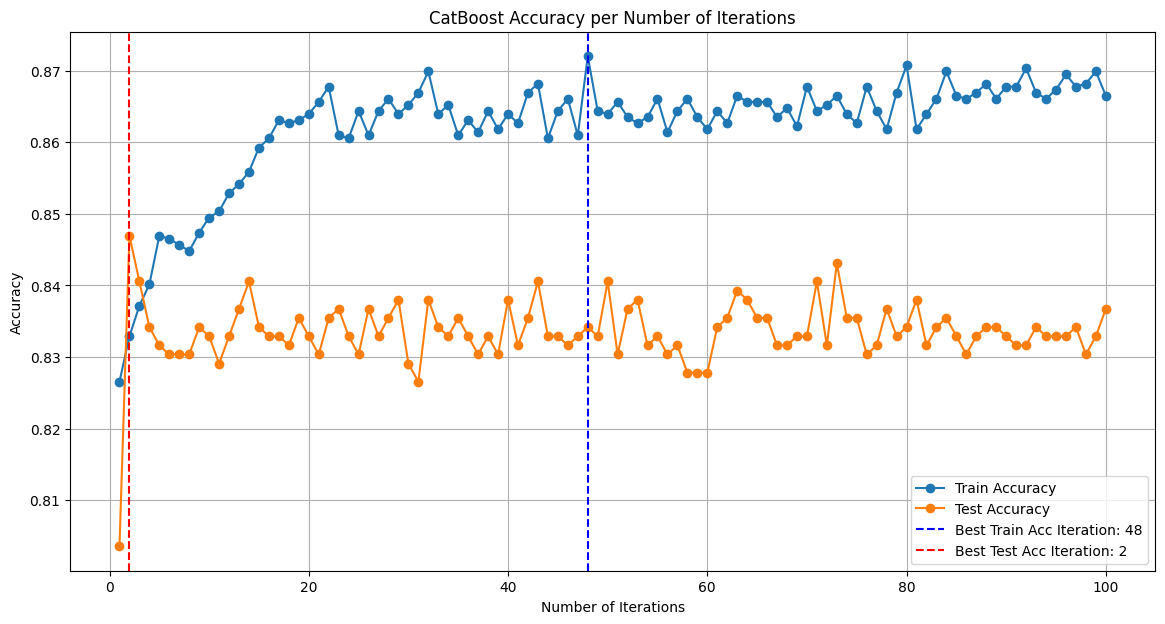

In [116]:
# Visualisasi akurasi menggunakan line chart
plt.figure(figsize=(14, 7))
plt.plot(range(1, 101), train_accuracy_history, label='Train Accuracy', marker='o')
plt.plot(range(1, 101), test_accuracy_history, label='Test Accuracy', marker='o')
plt.axvline(x=best_train_iter, color='b', linestyle='--', label=f'Best Train Acc Iteration: {best_train_iter}')
plt.axvline(x=best_test_iter, color='r', linestyle='--', label=f'Best Test Acc Iteration: {best_test_iter}')
plt.title('CatBoost Accuracy per Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# DeepLearning

In [84]:
# Membuat class untuk mengambil akurasi terbaik dari setiap epoch
class CustomCallback(Callback):
    def __init__(self):
        self.best_train_accuracy = 0
        self.best_test_accuracy = 0

    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] > self.best_test_accuracy:
            self.best_test_accuracy = logs['val_accuracy']
            self.best_train_accuracy = logs['accuracy']
            print(f"Epoch {epoch+1}: Best Test Accuracy so far: {self.best_test_accuracy}, Best Train Accuracy: {self.best_train_accuracy}")

# Inisialisasi model Sequential
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Buat instance dari CustomCallback
custom_callback = CustomCallback()

# Fit model dengan data latih dan data uji
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[custom_callback])

# Evaluasi model pada data uji
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Tampilkan akurasi terbaik dari setiap epoch
print(f"\nBest Test Accuracy: {custom_callback.best_test_accuracy}, Best Train Accuracy: {custom_callback.best_train_accuracy}")



Epoch 1/100
74/74 [==============================] - 1s 5ms/step - loss: 0.9204 - accuracy: 0.6777 - val_loss: 0.4736 - val_accuracy: 0.7679
Epoch 2/100
74/74 [==============================] - 0s 4ms/step - loss: 0.4832 - accuracy: 0.7751 - val_loss: 0.4408 - val_accuracy: 0.7934
Epoch 3/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4700 - accuracy: 0.7691 - val_loss: 0.4408 - val_accuracy: 0.7819
Epoch 4/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7874 - val_loss: 0.4591 - val_accuracy: 0.7806
Epoch 5/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.7844 - val_loss: 0.4374 - val_accuracy: 0.8023
Epoch 6/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.7993 - val_loss: 0.4241 - val_accuracy: 0.8023
Epoch 7/100
74/74 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.7985 - val_loss: 0.4088 - val_accuracy: 0.8010
Epoch 8/100
7

Epoch 49/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4496 - accuracy: 0.7963 - val_loss: 0.3747 - val_accuracy: 0.8253
Epoch 50/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4012 - accuracy: 0.8138 - val_loss: 0.3867 - val_accuracy: 0.8099
Epoch 51/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4140 - accuracy: 0.8134 - val_loss: 0.4313 - val_accuracy: 0.8036
Epoch 52/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8082 - val_loss: 0.3878 - val_accuracy: 0.8087
Epoch 53/100
74/74 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8197 - val_loss: 0.3820 - val_accuracy: 0.8138
Epoch 54/100
74/74 [==============================] - 0s 3ms/step - loss: 0.3985 - accuracy: 0.8189 - val_loss: 0.3789 - val_accuracy: 0.8214
Epoch 55/100
74/74 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8125 - val_loss: 0.3732 - val_accuracy: 0.8316
Epoch 

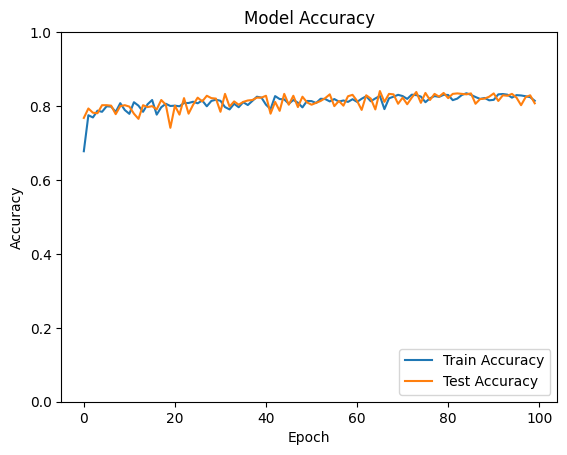

In [85]:
# Visualisasi akurasi menggunakan line chart
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

# Model Comparison

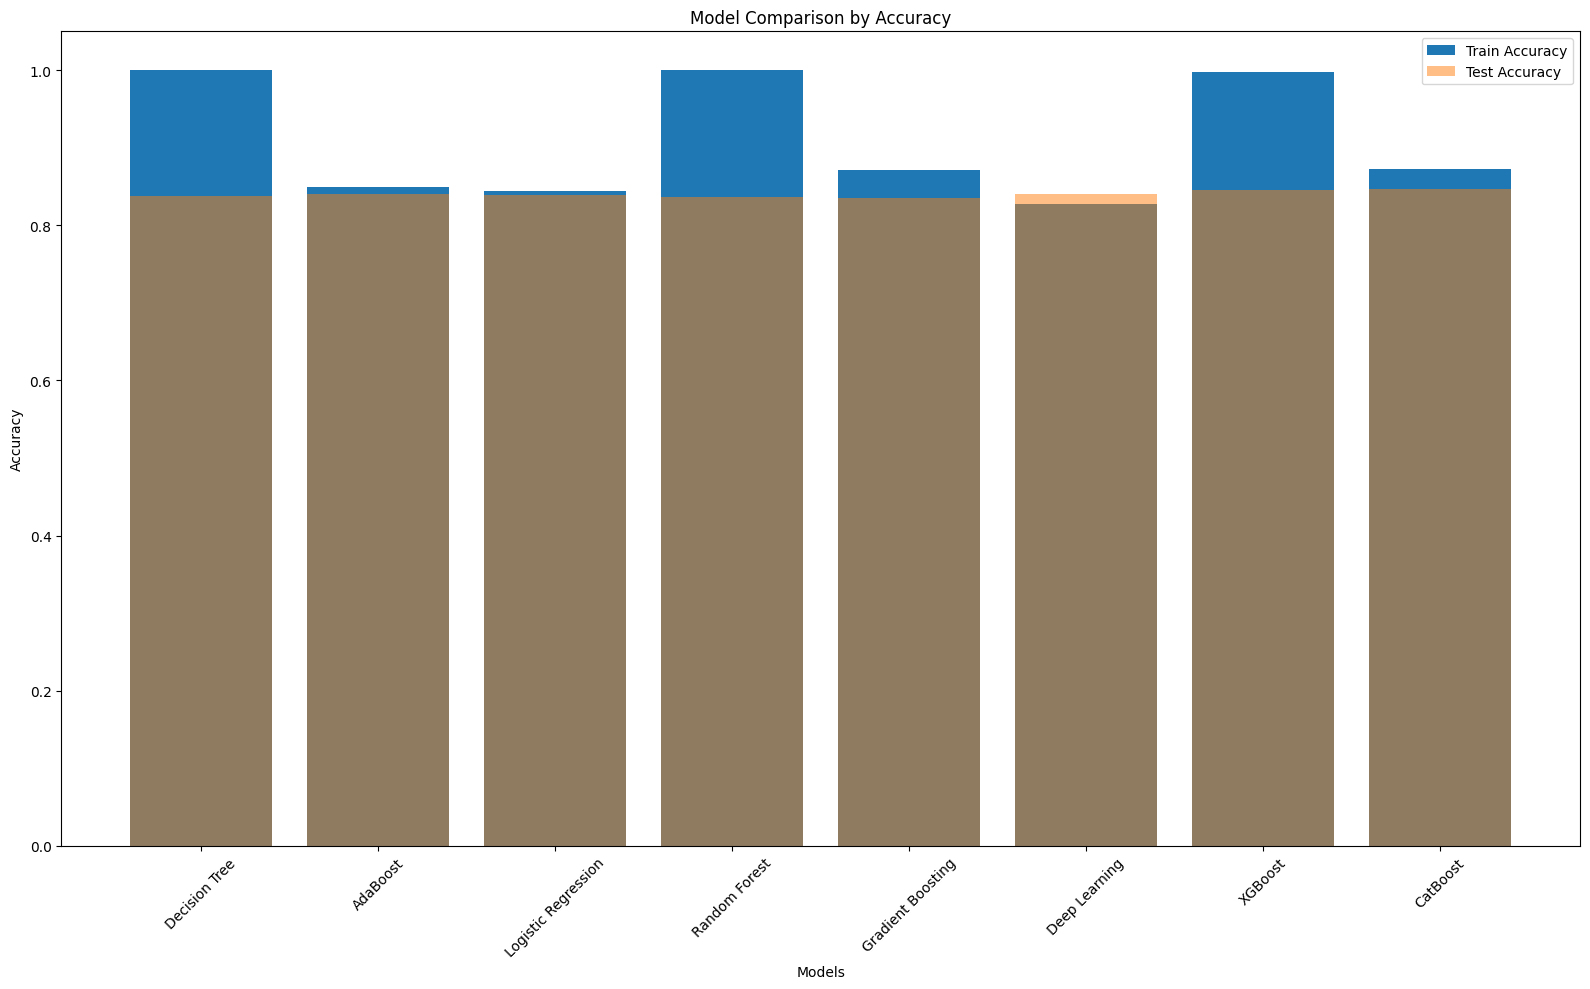

In [117]:
import matplotlib.pyplot as plt

# List dari model dan akurasi
models = ['Decision Tree', 'AdaBoost', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Deep Learning', 'XGBoost', 'CatBoost']
train_accuracies = [best_train_accuracy_dt, best_train_accuracy_ada, best_train_accuracy_lr, best_train_accuracy_rf, best_train_accuracy_gbt, custom_callback.best_train_accuracy, best_train_accuracy_xgb, best_train_accuracy_cat]
test_accuracies = [best_test_accuracy_dt, best_test_accuracy_ada, best_test_accuracy_lr, best_test_accuracy_rf, best_test_accuracy_gbt, custom_callback.best_test_accuracy, best_test_accuracy_xgb, best_test_accuracy_cat]

# Plotting
plt.figure(figsize=(16, 10))

plt.bar(models, train_accuracies, label='Train Accuracy')
plt.bar(models, test_accuracies, label='Test Accuracy', alpha=0.5)

plt.title('Model Comparison by Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [118]:
# Gabungkan dua list menjadi satu list tuple
combined_train_accuracies = list(zip(models, train_accuracies))
combined_test_accuracies = list(zip(models, test_accuracies))

# Urutkan model berdasarkan akurasi terbaik hingga terburuk untuk kedua kelompok train dan test
sorted_train_accuracies = sorted(combined_train_accuracies, key=lambda x: x[1], reverse=True)
sorted_test_accuracies = sorted(combined_test_accuracies, key=lambda x: x[1], reverse=True)

# Pisahkan kembali model terbaik dari hasil pengurutan
best_train_models = [model[0] for model in sorted_train_accuracies]
best_test_models = [model[0] for model in sorted_test_accuracies]

# Tampilkan model terbaik
print("Train Models (from best to worst):", best_train_models)
print("Test Models (from best to worst):", best_test_models)

# Tampilkan model terbaik untuk kelompok test beserta angka akurasi
best_test_model = sorted_test_accuracies[0][0]
best_test_accuracy = sorted_test_accuracies[0][1]
print(f"The best model for test is '{best_test_model}' with accuracy: {best_test_accuracy}")


Train Models (from best to worst): ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'Gradient Boosting', 'AdaBoost', 'Logistic Regression', 'Deep Learning']
Test Models (from best to worst): ['CatBoost', 'XGBoost', 'AdaBoost', 'Deep Learning', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
The best model for test is 'CatBoost' with accuracy: 0.8469387755102041


# Model Extraction

In [119]:
# Simpan model CatBoost yang memiliki akurasi test terbaik
catboost_model.save_model('best_catboost_model.bin')

In [121]:
from catboost import CatBoostClassifier

# Muat model CatBoost yang memiliki akurasi test terbaik
best_catboost_model = CatBoostClassifier()
best_catboost_model.load_model('best_catboost_model.bin')  # Ganti 'best_catboost_model.bin' dengan nama model yang sesuai

# Input features
Tn = 25.6
Tx = 33.2
ff_avg = 2
ff_x = 4
Tavg = 27
ddd_car = "W"
ss = 8.7
ddd_x = 290
RH_avg = 88

# Mapping untuk ddd_car
ddd_car_mapping = {'W': 1, 'SW': 2, 'E': 3, 'S': 4, 'NE': 5, 'SE': 6, 'C': 7, 'N': 8, 'NW': 9}
ddd_car = ddd_car_mapping[ddd_car]

# Gabungkan variabel inputan pengguna
input_features = [[Tn, Tx, ff_avg, ff_x, Tavg, ss, ddd_x, ddd_car, RH_avg]]

# Lakukan prediksi menggunakan model CatBoost
prediction = best_catboost_model.predict(input_features)

# Tampilkan hasil prediksi
print("Nilai prediksi model:", prediction[0])

if prediction[0] == 1:
    print("Berdasarkan input yang diberikan, model memprediksi bahwa kemungkinan akan ada hujan.")
else:
    print("Berdasarkan input yang diberikan, model memprediksi bahwa kemungkinan tidak akan ada hujan.")


Nilai prediksi model: 1
Berdasarkan input yang diberikan, model memprediksi bahwa kemungkinan akan ada hujan.
